In [10]:
#import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
#Import motor velocity, time, frequency, node distance, angular frequency, k, and the errors for each
v, t, f, d, omega, k, t_err, f_err, d_err, omega_err, k_err = np.loadtxt("Slinky part 3.csv", skiprows = 7, delimiter = ',', unpack = True)

In [70]:
#define linear and exponential functions for curvefit
def f(x, a, b):
    return (a*(x) + b)
def g(x, m, b):
    return m*(x**b)

c squared is: 1.8500351979046554
omega0 squared is: 20.581941970142296


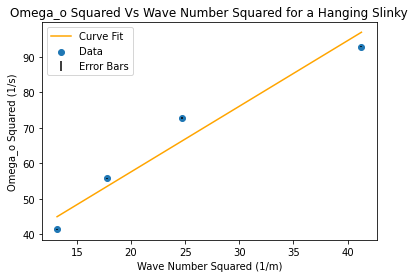

In [71]:
#Plot k^2 vs omega^2, fit the data and plot error bars
plt.scatter(k**2, omega**2, label = "Data")

sig = (omega**2)*2*(omega_err/omega)

p_opt, p_cov = curve_fit(f, k**2, omega**2, p0 = (1,2), sigma = sig, absolute_sigma = True)

c_sq = p_opt[0]
omega0_sq = p_opt[1]

plt.plot(k**2, f(k**2, c_sq, omega0_sq), color = "orange", label = "Curve Fit")

plt.ylabel("Omega_o Squared (1/s)")
plt.xlabel("Wave Number Squared (1/m)")
plt.title( "Omega_o Squared Vs Wave Number Squared for a Hanging Slinky")

plt.errorbar(k**2, omega**2, yerr=sig, color = "black", ls="none", label = "Error Bars")
plt.legend(loc="best")

#Print the found values for c squared and omega0 squared
print("c squared is:",c_sq)
print("omega0 squared is:",omega0_sq)

In [35]:
#Import distance from driver, amplitude and their errors
D, A, D_err, A_err = np.loadtxt("Slinky part 5.csv", skiprows = 1, delimiter = ',', unpack = True)

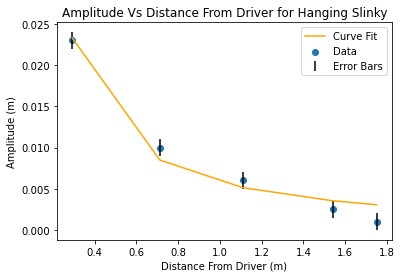

In [36]:
#Print Distance from driver vs Amplitude, fit the data and plot errorbars
plt.scatter(D, A, label = "Data")

sig2 = A_err

p_opt2, p_cov2 = curve_fit(g, D, A, p0 = (0.5,0.5), sigma = sig2, absolute_sigma = True)

plt.plot(D, g(D, p_opt2[0], p_opt2[1]), color = "orange", label = "Curve Fit")

plt.errorbar(D, A, yerr=sig2, color = "black", ls="none", label = "Error Bars")

plt.ylabel("Amplitude (m)")
plt.xlabel("Distance From Driver (m)")
plt.title( "Amplitude Vs Distance From Driver for Hanging Slinky")
plt.legend(loc="best")

In [56]:
x, yd, x_err, yd_err = np.loadtxt("Slinky part 6.csv", skiprows = 1, delimiter = ',', unpack = True)

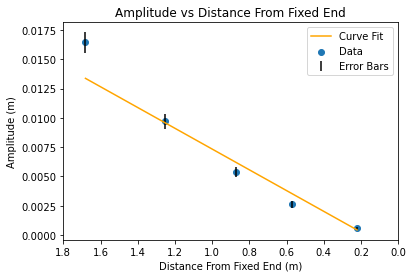

In [67]:
#Define the length of the slinky
L = 1.943
L_err = 0.001

#compute amplitude
y = yd*(x/L)

#plot the Amplitude vs Distance from the fixed end
plt.scatter(x, y, label = "Data")

#compute error in amplitude
sig3 = ((yd*x)*(np.sqrt((yd_err**2/yd**2)+(x_err**2/x**2))))
sig4 = (yd*(x/L))*np.sqrt((sig3**2/(yd*x)**2)+(L_err**2/L**2))

#plot curvefit and error bars
p_opt3, p_cov3 = curve_fit(f, x, y, p0 = (1,1), sigma = sig4, absolute_sigma = True)

plt.plot(x, f(x, p_opt3[0], p_opt3[1]), color = "orange", label = "Curve Fit")

plt.ylabel("Amplitude (m)")
plt.xlabel("Distance From Fixed End (m)")
plt.xlim(1.8,0)
plt.title( "Amplitude vs Distance From Fixed End")

plt.errorbar(x, y, yerr=sig4, color = "black", ls="none", label = "Error Bars")
plt.legend(loc="best")
